# Camera Calibration

At first I've extracted all the camera calibartion functions from the Advanced Lane Finding project into the file camera_calibration.py.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

from camera_calibration import *
mtx, dist, objpoints, imgpoints = get_calibration()

# Finding Lanes

Then I extracted the whole lane finding logic from the Advanced Lane Finding project into the files lane_finder.py and lane_detection_helpers.py.

This section just validates, that the transferred pipeline still works.

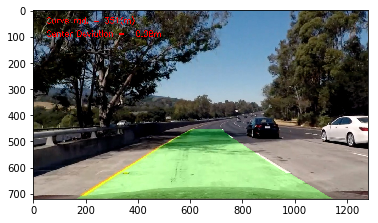

In [3]:
%reload_ext autoreload

test_image_class_1 = "test_images/test5.jpg"
test_image_class_1_output = "output_images/test5_pipeline.jpg"

from camera_calibration import *
mtx, dist, objpoints, imgpoints = get_calibration()

from lane_finder import *
   
laneFinder = LaneFinder(mtx, dist)

img1 = plt.imread(test_image_class_1)

output1 = laneFinder.process(img1)

plt.figure()
plt.imshow(output1)
plt.show()
plt.imsave(test_image_class_1_output, output1)

# Lesson functions

During the lessons, we've learned created a lot of useful helper functions. I've added all of them to lessons_functions.py. In this chapter I'm going through them stepe by step and validate, that they are working.

## Manual vehicle detection

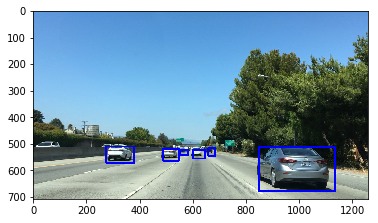

In [4]:
%reload_ext autoreload

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from lessons_functions import *

test_image = "test_images/bbox-example-image.jpg"
test_image_output = "output_images/bbox-example-image.jpg"

image = mpimg.imread(test_image)

bboxes = [((275, 572), (380, 510)), ((488, 563), (549, 518)), ((554, 543), (582, 522)), 
          ((601, 555), (646, 522)), ((657, 545), (685, 517)), ((849, 678), (1135, 512))]

result = draw_boxes(image, bboxes)
plt.imshow(result)
plt.show()
plt.imsave(test_image_output, result)

## Histograms of Color

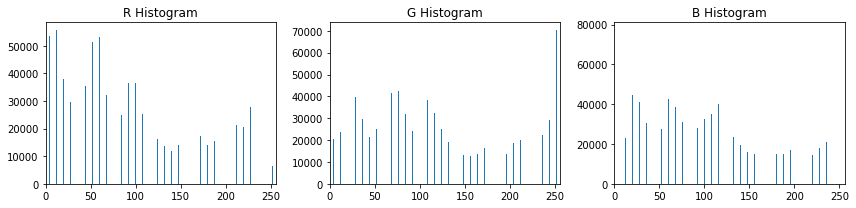

In [5]:
%reload_ext autoreload

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = "test_images/cutout1.jpg"
test_image_output = "output_images/cutout1-historgram-of-colors.jpg"

image = mpimg.imread(test_image)

# Plot a figure with all three bar charts
rh, gh, bh, bincen, feature_vec = color_hist(image, nbins=32, bins_range=(0, 256), full=True)

if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
    
    plt.show()
    
    fig.savefig(test_image_output)
else:
    print('Your function is returning None for at least one variable...')

## Explore Color Spaces

test_images/000275.png


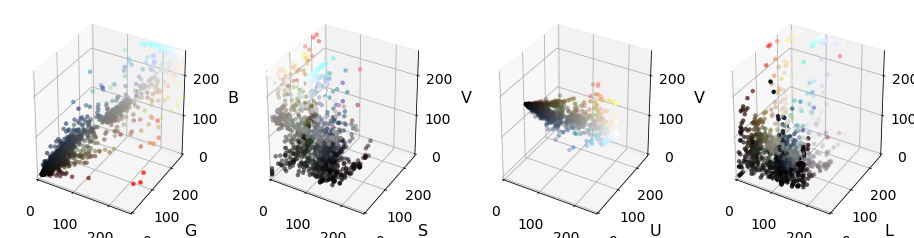

test_images/000528.png


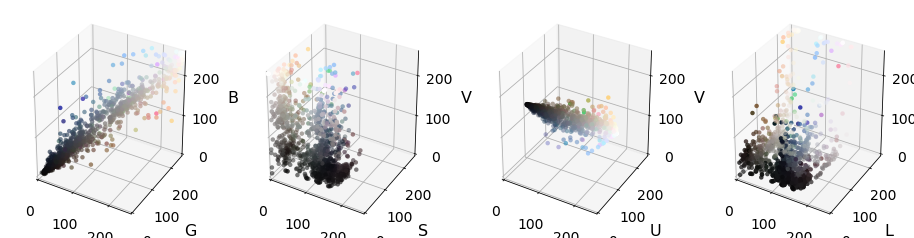

test_images/001240.png


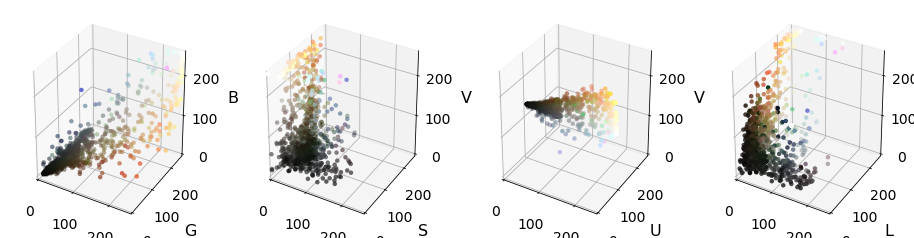

In [6]:
%reload_ext autoreload
%matplotlib inline

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
import numpy as np

from lessons_functions import *

test_images = [
    "test_images/000275.png", 
    "test_images/000528.png", 
    "test_images/001240.png"
]
test_image_output = [
    "output_images/000275-color-spaces.png", 
    "output_images/000528-color-spaces.png", 
    "output_images/001240-color-spaces.png"
]

def explore_color_space(test_image, test_image_output):
    print(test_image)
    # Read a color image
    img = cv2.imread(test_image)

    # Select a small fraction of pixels to plot by subsampling it
    scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
    img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

    # Convert subsampled image to desired color space(s)
    img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
    img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
    img_small_LUV = cv2.cvtColor(img_small, cv2.COLOR_BGR2LUV)
    img_small_HLS = cv2.cvtColor(img_small, cv2.COLOR_BGR2HLS)
    img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting
    
    fig = plt.figure(figsize=plt.figaspect(0.25))
    
    # create 3d plots
    plot3d(img_small_RGB, img_small_rgb, fig=fig, fig_position=141)
    plot3d(img_small_HSV, img_small_rgb, fig=fig, fig_position=142, axis_labels=list("HSV"))
    plot3d(img_small_LUV, img_small_rgb, fig=fig, fig_position=143, axis_labels=list("LUV"))
    plot3d(img_small_HLS, img_small_rgb, fig=fig, fig_position=144, axis_labels=list("HLS"))
    
    plt.show()
    

for i in range(len(test_images)):
    explore_color_space(test_images[i], test_image_output[i])


## Spatial Binning of Color

Here we are going to draw some spatial binned histograms for the different color spaces.

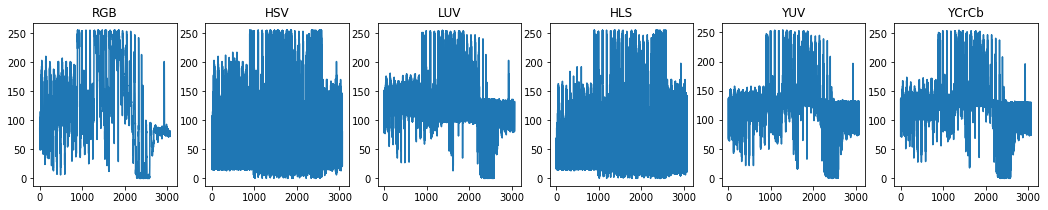

In [7]:
%reload_ext autoreload
%matplotlib inline

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from lessons_functions import *

test_image = "test_images/test_img.jpg"
test_image_output = "output_images/test_img-spatial-binning-of-colors.jpg"

image = mpimg.imread(test_image)

feature_vec = bin_spatial(image, color_space='RGB', size=(32, 32))
feature_vec_hsv = bin_spatial(image, color_space='HSV', size=(32, 32))
feature_vec_luv = bin_spatial(image, color_space='LUV', size=(32, 32))
feature_vec_hls = bin_spatial(image, color_space='HLS', size=(32, 32))
feature_vec_yuv = bin_spatial(image, color_space='YUV', size=(32, 32))
feature_vec_ycrb = bin_spatial(image, color_space='YCrCb', size=(32, 32))

fig = plt.figure(figsize=(18,3))
plt.subplot(161)
plt.plot(feature_vec)
plt.title('RGB')
plt.subplot(162)
plt.plot(feature_vec_hsv)
plt.title('HSV')
plt.subplot(163)
plt.plot(feature_vec_luv)
plt.title('LUV')
plt.subplot(164)
plt.plot(feature_vec_hls)
plt.title('HLS')
plt.subplot(165)
plt.plot(feature_vec_yuv)
plt.title('YUV')
plt.subplot(166)
plt.plot(feature_vec_ycrb)
plt.title('YCrCb')

plt.show()

fig.savefig(test_image_output)

## Data Exploration

Now we are going to explore the data we got from the udacity datasets.

Your function returned a count of 1196 cars and 1125 non-cars
of size:  (64, 64, 3) and data type: uint8


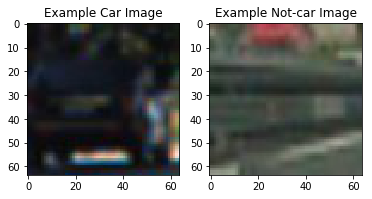

In [8]:
%reload_ext autoreload
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

from lessons_functions import *

notcars_images = glob.glob('test_images/non-vehicles_smallset/**/*.jpeg')
cars_images = glob.glob('test_images/vehicles_smallset/**/*.jpeg')
cars = []
notcars = []

for image in notcars_images:
    notcars.append(image)
    
for image in cars_images:
    cars.append(image)
        

data_info = data_look(cars, notcars)

print('Your function returned a count of', 
      data_info["n_cars"], 'cars and', 
      data_info["n_notcars"], 'non-cars')
print('of size: ',data_info["image_shape"], 'and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))
    
# Read in car / not-car images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])

# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')

## scikit image HOG

Let's dig into scikit HOG

/Users/ebbo/miniconda3/envs/carnd-term1-gpu/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


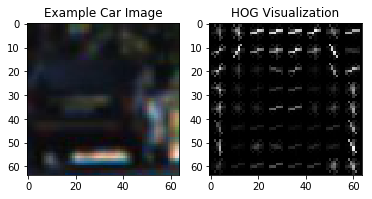

In [9]:
%reload_ext autoreload
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

from lessons_functions import *

cars_images = glob.glob('test_images/vehicles_smallset/**/*.jpeg')
cars = []

for image in cars_images:
    cars.append(image)
        
# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))
# Read in the image
image = mpimg.imread(cars[ind])
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)

# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')

## Combine and normalize features

Now we are going to combine features and normalize the data.

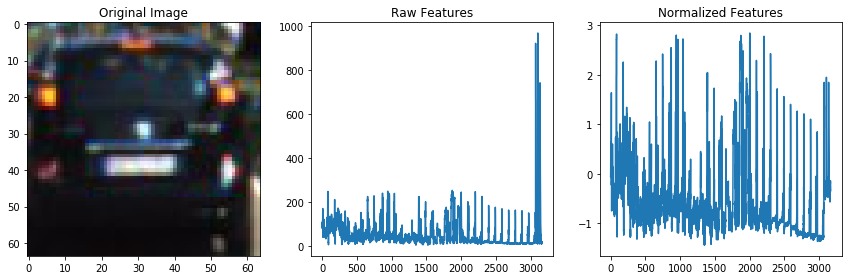

In [10]:
%reload_ext autoreload
%matplotlib inline

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import glob

from lessons_functions import *

notcars_images = glob.glob('test_images/non-vehicles_smallset/**/*.jpeg')
cars_images = glob.glob('test_images/vehicles_smallset/**/*.jpeg')
cars = []
notcars = []

for image in notcars_images:
    notcars.append(image)
    
for image in cars_images:
    cars.append(image)
    
car_features = combine_and_normalize(cars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
notcar_features = combine_and_normalize(notcars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))

if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')

# Color Classify

Now we are going to build a classifier based on just the image colors.

```
spatial = 16
histbin = 32
```

This gave me a Test Accuracy of SVC =  0.9957

In [11]:
%reload_ext autoreload
%matplotlib inline

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

from lessons_functions import *

notcars_images = glob.glob('test_images/non-vehicles_smallset/**/*.jpeg')
cars_images = glob.glob('test_images/vehicles_smallset/**/*.jpeg')
cars = []
notcars = []

for image in notcars_images:
    notcars.append(image)
    
for image in cars_images:
    cars.append(image)
    
spatial = 16
histbin = 32

car_features = extract_features_color_classify(cars, cspace='RGB', spatial_size=(spatial, spatial),
                        hist_bins=histbin, hist_range=(0, 256))
notcar_features = extract_features_color_classify(notcars, cspace='RGB', spatial_size=(spatial, spatial),
                        hist_bins=histbin, hist_range=(0, 256))

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using spatial binning of:',spatial,
    'and', histbin,'histogram bins')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

/Users/ebbo/miniconda3/envs/carnd-term1-gpu/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Using spatial binning of: 16 and 32 histogram bins
Feature vector length: 864
0.25 Seconds to train SVC...
Test Accuracy of SVC =  0.9871
My SVC predicts:  [ 1.  1.  0.  1.  0.  0.  1.  1.  0.  0.]
For these 10 labels:  [ 1.  1.  0.  1.  0.  0.  1.  1.  0.  0.]
0.00153 Seconds to predict 10 labels with SVC


# HOG Classify

Now we are going to build a second classifier using HOG features.

After playing around with different input parameters, I've been ending up using:

```
colorspace = "YCrCb" # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 4
cell_per_block = 4
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
```

This gave me a Test Accuracy of SVC =  0.99

In [12]:
%reload_ext autoreload
%matplotlib inline

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

from lessons_functions import *

notcars_images = glob.glob('test_images/non-vehicles_smallset/**/*.jpeg')
cars_images = glob.glob('test_images/vehicles_smallset/**/*.jpeg')
cars = []
notcars = []

for image in notcars_images:
    notcars.append(image)
    
for image in cars_images:
    cars.append(image)
    
# Reduce the sample size because HOG features are slow to compute
# The quiz evaluator times out after 13s of CPU time
sample_size = 500
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

colorspace = "YCrCb" # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 4
cell_per_block = 4
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"

t=time.time()
car_features = extract_features_hog_classify(cars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_features = extract_features_hog_classify(notcars, cspace=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to extract HOG features...')
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

/Users/ebbo/miniconda3/envs/carnd-term1-gpu/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


7.79 Seconds to extract HOG features...
Using: 9 orientations 4 pixels per cell and 4 cells per block
Feature vector length: 73008
1.46 Seconds to train SVC...
Test Accuracy of SVC =  1.0
My SVC predicts:  [ 1.  0.  0.  0.  1.  1.  1.  0.  0.  0.]
For these 10 labels:  [ 1.  0.  0.  0.  1.  1.  1.  0.  0.  0.]
0.00224 Seconds to predict 10 labels with SVC


# Sliding Window

Now I'm going to implement a sliding window feature.

Number of windows 180


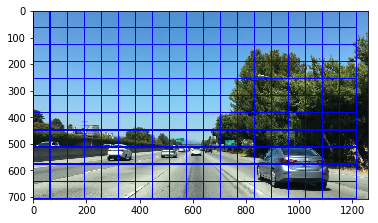

In [13]:
%reload_ext autoreload

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from lessons_functions import *

test_image = "test_images/bbox-example-image.jpg"
test_image_output = "output_images/bbox-example-image-sliding-window.jpg"

image = mpimg.imread(test_image)
image_size = 128

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(image_size, image_size), xy_overlap=(0.5, 0.5))

print('Number of windows', len(windows))

                       
result = draw_boxes(image, windows, color=(0, 0, 255), thick=3)  
plt.imshow(result)
plt.show()
result = draw_boxes(image, windows, color=(0, 0, 255), thick=1)  
plt.imsave(test_image_output, result)

Now with a different size and just the lower half:

Number of windows 296


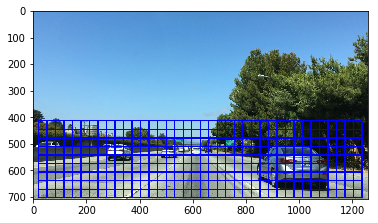

In [14]:
%reload_ext autoreload

import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from lessons_functions import *

test_image = "test_images/bbox-example-image.jpg"
test_image_output = "output_images/bbox-example-image-sliding-window-big.jpg"

image = mpimg.imread(test_image)

image_size=64
threshold_top = 60
threshold_left = 20
threshold_right = 20
threshold_bottom = 0

x_start_stop = [threshold_left, image.shape[1] - threshold_right]
y_start_stop=[round(image.shape[0]/2) + threshold_top, image.shape[0] - threshold_bottom]

windows = slide_window(image, x_start_stop=x_start_stop, y_start_stop=y_start_stop, 
                    xy_window=(image_size, image_size), xy_overlap=(0.5, 0.5))
         
print('Number of windows', len(windows))

result = draw_boxes(image, windows, color=(0, 0, 255), thick=3)                    
plt.imshow(result)
plt.show()
result = draw_boxes(image, windows, color=(0, 0, 255), thick=1)   
plt.imsave(test_image_output, result)

Now I want to define a set of image sizes, with a color, should be drawn.

We are going to define 5 image size:

* size=512
* size=256
* size=128
* size=64
* size=32

So I'm going to create function create_windows() to get thos windows.

Without bottom threshold 2076
With bottom threshold 1107


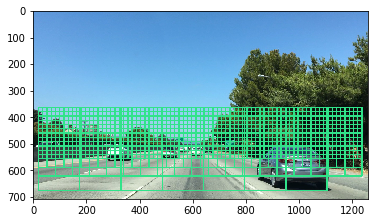

In [15]:
%reload_ext autoreload

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from lessons_functions import *

image_sizes = [310, 128, 64, 32]
bottom_thresholds = [0, 50, 100, 150]
threshold_top = 10
threshold_left = 20
threshold_right = 20

test_image = "test_images/bbox-example-image.jpg"
test_image_output = "output_images/bbox-example-image-sliding-window-thresholds.jpg"

img = mpimg.imread(test_image)

windows = multiple_slide_windows(img, image_sizes, 0, 0, 0, [0,0,0,0])

print('Without bottom threshold', len(windows))

windows = multiple_slide_windows(img, image_sizes, threshold_left, threshold_right, threshold_top, bottom_thresholds)

print('With bottom threshold', len(windows))

result = draw_boxes(image, windows, color=(49, 227, 138), thick=3)  
plt.imshow(result)
plt.show()
result = draw_boxes(image, windows, color=(49, 227, 138), thick=1)  
plt.imsave(test_image_output, result)

The thresholds save us around 1000 windows.

# Search and Classify

Now we are going to train our classifier. I'm using the values found in the chapter before, as the results have been very good.
From now on, we are going to use the full dataset.

The dataset looks pretty good, as both classes (cars and noncars) are about equal in size. So we should't run into over- and underfitting problems because of the pure input size.

cars 8792
notcars 8968


/Users/ebbo/miniconda3/envs/carnd-term1-gpu/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Using: 9 orientations 4 pixels per cell and 4 cells per block
Feature vector length: 76176
22.18 Seconds to train SVC...
Test Accuracy of SVC =  0.9967


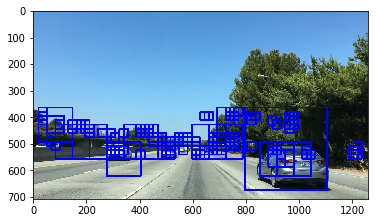

In [16]:
%reload_ext autoreload

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.cross_validation import train_test_split

from lessons_functions import *

notcars_images = glob.glob('test_images/non-vehicles/**/*.png')
cars_images = glob.glob('test_images/vehicles/**/*.png')
cars = []
notcars = []

for image in notcars_images:
    notcars.append(image)
    
for image in cars_images:
    cars.append(image)
    
print("cars", len(cars))
print("notcars", len(notcars))

# Using the values, I discovered in the chapters before.
sample_size = 3000
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 4 # HOG pixels per cell
cell_per_block = 4 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()
test_image = "test_images/bbox-example-image.jpg"
test_image_output = "output_images/bbox-example-image-train-and-classify.jpg"
image_sizes = [310, 256, 128, 64, 32]
bottom_thresholds = [0, 0, 0, 50, 100]
threshold_top = 10
threshold_left = 20
threshold_right = 20

cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))


# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

image = mpimg.imread(test_image)
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
image = image.astype(np.float32)/255

image_sizes = [310, 128, 64, 32]
bottom_thresholds = [0, 50, 100, 150]
threshold_top = 10
threshold_left = 20
threshold_right = 20

windows = multiple_slide_windows(img, image_sizes, threshold_left, threshold_right, threshold_top, bottom_thresholds)
    
dist_pickle = {}
dist_pickle["svc"] = svc
dist_pickle["X_scaler"] = X_scaler
dist_pickle["windows"] = windows
dist_pickle["color_space"] = color_space
dist_pickle["orient"] = orient
dist_pickle["pix_per_cell"] = pix_per_cell
dist_pickle["cell_per_block"] = cell_per_block
dist_pickle["color_space"] = color_space
dist_pickle["hog_channel"] = hog_channel
dist_pickle["hist_bins"] = hist_bins
dist_pickle["spatial_size"] = spatial_size
dist_pickle["spatial_feat"] = spatial_feat
dist_pickle["hist_feat"] = hist_feat
dist_pickle["hog_feat"] = hog_feat
dist_pickle["y_start_stop"] = y_start_stop
dist_pickle["image_sizes"] = image_sizes
dist_pickle["bottom_thresholds"] = bottom_thresholds
dist_pickle["threshold_top"] = threshold_top
dist_pickle["threshold_left"] = threshold_left
dist_pickle["threshold_right"] = threshold_right
pickle.dump( dist_pickle, open("svc_pickle.p", "wb" ) )

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)    

result = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(result)
plt.show()
result = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=1)    
plt.imsave(test_image_output, result)

# HOG subsampling and window search

The find_cars only has to extract hog features once and then can be sub-sampled to get all of its overlaying windows. Each window is defined by a scaling factor where a scale of 1 would result in a window that's 8 x 8 cells then the overlap of each window is in terms of the cell distance.

/Users/ebbo/miniconda3/envs/carnd-term1-gpu/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


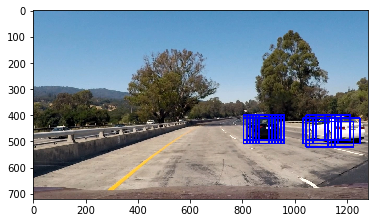

In [17]:
%reload_ext autoreload

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from lessons_functions import *

test_image = "test_images/test1.jpg"
test_image_output = "output_images/test1-hog-subsampling.jpg"

dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
svc = dist_pickle["svc"]
X_scaler = dist_pickle["X_scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]

img = mpimg.imread(test_image)
    
ystart = 400
ystop = 656
scale = 1.5
    
bboxes = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

result = draw_boxes(img, bboxes, color=(0, 0, 255), thick=6)
pickle.dump( bboxes, open("bbox_pickle.p", "wb" ) )
plt.imshow(result)
plt.imsave(test_image_output, result)


# Add Heatmap

I'm using the a (thresholded) heatmap to reduce false/positives as well as false/negatives.

2 cars found


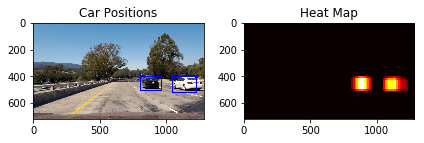

In [18]:
%reload_ext autoreload

from lessons_functions import *

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

test_image = "test_images/test1.jpg"
test_image_output = "output_images/test1-heatmap.jpg"

# Read in a pickle file with bboxes saved
# Each item in the "all_bboxes" list will contain a 
# list of boxes for one of the images shown above
box_list = pickle.load( open( "bbox_pickle.p", "rb" ))

# Read in image similar to one shown above 
image = mpimg.imread(test_image)
heat = np.zeros_like(image[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = add_heat(heat, box_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat, 1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()


print(labels[1], 'cars found')

# Car Finder

I'm building a CarFinder class in car_finder.py. It offers an process function, that takes an image and returns a process image with boxes drawn around all the cars.

I'm reusing the pretrained model and the same input parameters, from the lessons before.

# Process

Finally it is time to use the stuff we produced up to now. I'm going to create a process function, that takes image, lane_finder and a car_finder and produces an output image.

In [19]:
def process(img, lane_finder = None, car_finder = None):
        
    if car_finder is not None:
        img = car_finder.process(img)
        
    if lane_finder is not None:
        img = lane_finder.process(img)
        
    if car_finder is not None:
        img = car_finder.output_info(img)
        
    return img

## Process Image

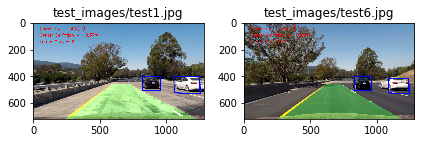

In [40]:
%reload_ext autoreload

from camera_calibration import *
mtx, dist, objpoints, imgpoints = get_calibration()

test_image = "test_images/test1.jpg"
test_image2 = "test_images/test6.jpg"
test_image_output = "output_images/test1-car_finder.jpg"
test_image_output2 = "output_images/test6-car_finder.jpg"

from lane_finder import *
from car_finder import *
   
lane_finder = LaneFinder(mtx, dist)

dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
svc = dist_pickle["svc"]
X_scaler = dist_pickle["X_scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]
color_space = dist_pickle["color_space"]
hog_channel = dist_pickle["hog_channel"]
spatial_feat = dist_pickle["spatial_feat"]
hist_feat = dist_pickle["hist_feat"]
hog_feat = dist_pickle["hog_feat"]

car_finder = CarFinder(svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, color_space, hog_channel, spatial_feat, hist_feat, hog_feat)

img1 = plt.imread(test_image)
img2 = plt.imread(test_image2)

result = process(img, lane_finder, car_finder)
result2 = process(img2, lane_finder, car_finder)

fig = plt.figure()
plt.subplot(121)
plt.imshow(result)
plt.title(test_image)
plt.subplot(122)
plt.imshow(result2)
plt.title(test_image2)
fig.tight_layout()
plt.figure()

plt.imsave(test_image_output, result)
plt.imsave(test_image_output2, result2)

## Process video 

Finally I'm using the LaneFinder together with CarFinder to handle the videos and output the project videos.

### Setup Variables

In [41]:
project_video = 'project_video.mp4'
test_video = 'test_video.mp4'
project_video_output = 'output_videos/project_video_output.mp4'
test_video_output = 'output_videos/test_video_output.mp4'

### Test Video

The output file is located at: 'output_videos/test_video_output.mp4'

In [46]:
%reload_ext autoreload

from moviepy.editor import VideoFileClip
from IPython.display import HTML

from camera_calibration import *
mtx, dist, objpoints, imgpoints = get_calibration()

dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
svc = dist_pickle["svc"]
X_scaler = dist_pickle["X_scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]
color_space = dist_pickle["color_space"]
hog_channel = dist_pickle["hog_channel"]
spatial_feat = dist_pickle["spatial_feat"]
hist_feat = dist_pickle["hist_feat"]
hog_feat = dist_pickle["hog_feat"]

car_finder = CarFinder(svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, color_space, hog_channel, spatial_feat, hist_feat, hog_feat)
lane_finder = LaneFinder(mtx, dist)

clip = VideoFileClip(test_video)
print('Duration: ', clip.duration)
output_clip = clip.fl_image(lambda frame: process(frame, lane_finder, car_finder))
output_clip.write_videofile(test_video_output, audio=False)

Duration:  1.52
[MoviePy] >>>> Building video output_videos/test_video_output.mp4
[MoviePy] Writing video output_videos/test_video_output.mp4





  0%|          | 0/39 [00:00<?, ?it/s]


  3%|▎         | 1/39 [00:01<01:07,  1.79s/it]


  5%|▌         | 2/39 [00:03<01:07,  1.81s/it]


  8%|▊         | 3/39 [00:05<01:04,  1.80s/it]


 10%|█         | 4/39 [00:07<01:02,  1.80s/it]


 13%|█▎        | 5/39 [00:09<01:03,  1.86s/it]


 15%|█▌        | 6/39 [00:11<01:02,  1.91s/it]


 18%|█▊        | 7/39 [00:13<01:01,  1.91s/it]


 21%|██        | 8/39 [00:14<00:58,  1.89s/it]


 23%|██▎       | 9/39 [00:16<00:55,  1.86s/it]


 26%|██▌       | 10/39 [00:18<00:53,  1.85s/it]


 28%|██▊       | 11/39 [00:20<00:51,  1.83s/it]


 31%|███       | 12/39 [00:22<00:49,  1.82s/it]


 33%|███▎      | 13/39 [00:24<00:47,  1.82s/it]


 36%|███▌      | 14/39 [00:25<00:45,  1.81s/it]


 38%|███▊      | 15/39 [00:27<00:43,  1.81s/it]


 41%|████      | 16/39 [00:29<00:41,  1.81s/it]


 44%|████▎     | 17/39 [00:31<00:40,  1.84s/it]


 46%|████▌     | 18/39 [00:33<00:38,  1.83s/it]


 49%|████▊     | 19/39 [00:34<00:36,  1.82s/it]


 51%|█████▏    

[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/test_video_output.mp4 



### Project Video

The output file is located at: 'output_videos/video_output.mp4'

In [47]:
%reload_ext autoreload

from moviepy.editor import VideoFileClip
from IPython.display import HTML

from camera_calibration import *
mtx, dist, objpoints, imgpoints = get_calibration()

from lane_finder import *
from car_finder import *

dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
svc = dist_pickle["svc"]
X_scaler = dist_pickle["X_scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]
color_space = dist_pickle["color_space"]
hog_channel = dist_pickle["hog_channel"]
spatial_feat = dist_pickle["spatial_feat"]
hist_feat = dist_pickle["hist_feat"]
hog_feat = dist_pickle["hog_feat"]

car_finder = CarFinder(svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, color_space, hog_channel, spatial_feat, hist_feat, hog_feat)
lane_finder = LaneFinder(mtx, dist)

clip = VideoFileClip(project_video)
# clip = clip.subclip(t_start=40, t_end=41)
# clip = clip.subclip(t_start=23, t_end=30)
# clip = clip.subclip(t_start=5, t_end=8)
# clip = clip.subclip(t_start=35, t_end=35.2)
# clip = clip.subclip(t_start=38, t_end=42)
# clip = clip.subclip(t_start=38.5, t_end=39)
print('Duration: ', clip.duration)
output_clip = clip.fl_image(lambda frame: process(frame, lane_finder, car_finder))
output_clip.write_videofile(project_video_output, audio=False)


Duration:  50.4
[MoviePy] >>>> Building video output_videos/project_video_output.mp4
[MoviePy] Writing video output_videos/project_video_output.mp4





  0%|          | 0/1261 [00:00<?, ?it/s]


  0%|          | 1/1261 [00:01<37:53,  1.80s/it]


  0%|          | 2/1261 [00:03<37:53,  1.81s/it]


  0%|          | 3/1261 [00:05<37:48,  1.80s/it]


  0%|          | 4/1261 [00:07<37:44,  1.80s/it]


  0%|          | 5/1261 [00:09<39:23,  1.88s/it]


  0%|          | 6/1261 [00:11<39:18,  1.88s/it]


  1%|          | 7/1261 [00:12<38:50,  1.86s/it]


  1%|          | 8/1261 [00:14<38:20,  1.84s/it]


  1%|          | 9/1261 [00:16<38:01,  1.82s/it]


  1%|          | 10/1261 [00:18<37:51,  1.82s/it]


  1%|          | 11/1261 [00:20<38:02,  1.83s/it]


  1%|          | 12/1261 [00:21<37:43,  1.81s/it]


  1%|          | 13/1261 [00:23<38:17,  1.84s/it]


  1%|          | 14/1261 [00:25<38:20,  1.84s/it]


  1%|          | 15/1261 [00:27<38:45,  1.87s/it]


  1%|▏         | 16/1261 [00:29<38:36,  1.86s/it]


  1%|▏         | 17/1261 [00:31<38:37,  1.86s/it]


  1%|▏         | 18/1261 [00:33<38:50,  1.87s/it]


  2%|▏         | 19/1261 [0

 11%|█         | 133/1261 [05:42<36:13,  1.93s/it]


 11%|█         | 134/1261 [05:44<35:45,  1.90s/it]


 11%|█         | 135/1261 [05:46<35:26,  1.89s/it]


 11%|█         | 136/1261 [05:48<34:51,  1.86s/it]


 11%|█         | 137/1261 [05:49<34:24,  1.84s/it]


 11%|█         | 138/1261 [05:51<34:08,  1.82s/it]


 11%|█         | 139/1261 [05:53<34:06,  1.82s/it]


 11%|█         | 140/1261 [05:55<33:47,  1.81s/it]


 11%|█         | 141/1261 [05:57<33:44,  1.81s/it]


 11%|█▏        | 142/1261 [05:58<34:15,  1.84s/it]


 11%|█▏        | 143/1261 [06:00<33:58,  1.82s/it]


 11%|█▏        | 144/1261 [06:20<2:16:10,  7.31s/it]


 11%|█▏        | 145/1261 [06:22<1:45:15,  5.66s/it]


 12%|█▏        | 146/1261 [06:24<1:23:35,  4.50s/it]


 12%|█▏        | 147/1261 [06:26<1:08:27,  3.69s/it]


 12%|█▏        | 148/1261 [06:28<58:01,  3.13s/it]  


 12%|█▏        | 149/1261 [06:30<52:01,  2.81s/it]


 12%|█▏        | 150/1261 [06:32<46:52,  2.53s/it]


 12%|█▏        | 151/1261 [06:34<44:

 21%|██        | 264/1261 [11:31<1:56:23,  7.00s/it]


 21%|██        | 265/1261 [11:33<1:30:15,  5.44s/it]


 21%|██        | 266/1261 [11:35<1:11:57,  4.34s/it]


 21%|██        | 267/1261 [11:36<59:06,  3.57s/it]  


 21%|██▏       | 268/1261 [11:38<50:10,  3.03s/it]


 21%|██▏       | 269/1261 [11:40<43:50,  2.65s/it]


 21%|██▏       | 270/1261 [11:42<39:24,  2.39s/it]


 21%|██▏       | 271/1261 [11:43<36:19,  2.20s/it]


 22%|██▏       | 272/1261 [11:45<34:11,  2.07s/it]


 22%|██▏       | 273/1261 [11:47<32:43,  1.99s/it]


 22%|██▏       | 274/1261 [11:49<31:37,  1.92s/it]


 22%|██▏       | 275/1261 [11:50<30:48,  1.88s/it]


 22%|██▏       | 276/1261 [11:52<30:18,  1.85s/it]


 22%|██▏       | 277/1261 [11:54<29:53,  1.82s/it]


 22%|██▏       | 278/1261 [11:56<29:41,  1.81s/it]


 22%|██▏       | 279/1261 [11:58<29:29,  1.80s/it]


 22%|██▏       | 280/1261 [11:59<29:19,  1.79s/it]


 22%|██▏       | 281/1261 [12:01<29:13,  1.79s/it]


 22%|██▏       | 282/1261 [12:03<29:03

 31%|███▏      | 395/1261 [17:13<28:06,  1.95s/it]


 31%|███▏      | 396/1261 [17:15<27:50,  1.93s/it]


 31%|███▏      | 397/1261 [17:17<27:35,  1.92s/it]


 32%|███▏      | 398/1261 [17:18<27:30,  1.91s/it]


 32%|███▏      | 399/1261 [17:20<27:03,  1.88s/it]


 32%|███▏      | 400/1261 [17:22<26:40,  1.86s/it]


 32%|███▏      | 401/1261 [17:24<26:19,  1.84s/it]


 32%|███▏      | 402/1261 [17:26<26:14,  1.83s/it]


 32%|███▏      | 403/1261 [17:28<26:01,  1.82s/it]


 32%|███▏      | 404/1261 [17:29<25:53,  1.81s/it]


 32%|███▏      | 405/1261 [17:31<25:45,  1.81s/it]


 32%|███▏      | 406/1261 [17:33<25:44,  1.81s/it]


 32%|███▏      | 407/1261 [17:35<25:53,  1.82s/it]


 32%|███▏      | 408/1261 [17:54<1:39:31,  7.00s/it]


 32%|███▏      | 409/1261 [17:56<1:17:16,  5.44s/it]


 33%|███▎      | 410/1261 [17:57<1:01:36,  4.34s/it]


 33%|███▎      | 411/1261 [17:59<50:38,  3.57s/it]  


 33%|███▎      | 412/1261 [18:01<42:58,  3.04s/it]


 33%|███▎      | 413/1261 [18:03<37:37

 42%|████▏     | 526/1261 [22:45<23:02,  1.88s/it]


 42%|████▏     | 527/1261 [22:46<23:01,  1.88s/it]


 42%|████▏     | 528/1261 [23:07<1:31:47,  7.51s/it]


 42%|████▏     | 529/1261 [23:09<1:11:42,  5.88s/it]


 42%|████▏     | 530/1261 [23:11<57:09,  4.69s/it]  


 42%|████▏     | 531/1261 [23:13<47:03,  3.87s/it]


 42%|████▏     | 532/1261 [23:15<39:47,  3.27s/it]


 42%|████▏     | 533/1261 [23:17<34:25,  2.84s/it]


 42%|████▏     | 534/1261 [23:19<30:48,  2.54s/it]


 42%|████▏     | 535/1261 [23:20<28:28,  2.35s/it]


 43%|████▎     | 536/1261 [23:22<26:43,  2.21s/it]


 43%|████▎     | 537/1261 [23:24<26:01,  2.16s/it]


 43%|████▎     | 538/1261 [23:26<24:52,  2.06s/it]


 43%|████▎     | 539/1261 [23:28<23:53,  1.99s/it]


 43%|████▎     | 540/1261 [23:30<24:34,  2.04s/it]


 43%|████▎     | 541/1261 [23:32<24:35,  2.05s/it]


 43%|████▎     | 542/1261 [23:34<24:06,  2.01s/it]


 43%|████▎     | 543/1261 [23:36<23:32,  1.97s/it]


 43%|████▎     | 544/1261 [23:38<23:00, 

 52%|█████▏    | 657/1261 [28:34<19:58,  1.98s/it]


 52%|█████▏    | 658/1261 [28:35<19:20,  1.92s/it]


 52%|█████▏    | 659/1261 [28:37<18:52,  1.88s/it]


 52%|█████▏    | 660/1261 [28:39<18:32,  1.85s/it]


 52%|█████▏    | 661/1261 [28:41<18:17,  1.83s/it]


 52%|█████▏    | 662/1261 [28:43<18:05,  1.81s/it]


 53%|█████▎    | 663/1261 [28:44<17:55,  1.80s/it]


 53%|█████▎    | 664/1261 [28:46<17:51,  1.79s/it]


 53%|█████▎    | 665/1261 [28:48<17:45,  1.79s/it]


 53%|█████▎    | 666/1261 [28:50<17:40,  1.78s/it]


 53%|█████▎    | 667/1261 [28:51<17:36,  1.78s/it]


 53%|█████▎    | 668/1261 [28:53<17:32,  1.78s/it]


 53%|█████▎    | 669/1261 [28:55<17:32,  1.78s/it]


 53%|█████▎    | 670/1261 [28:57<17:30,  1.78s/it]


 53%|█████▎    | 671/1261 [28:59<17:27,  1.78s/it]


 53%|█████▎    | 672/1261 [29:17<1:07:20,  6.86s/it]


 53%|█████▎    | 673/1261 [29:19<52:16,  5.33s/it]  


 53%|█████▎    | 674/1261 [29:21<41:46,  4.27s/it]


 54%|█████▎    | 675/1261 [29:23<34:21,  3

 62%|██████▏   | 788/1261 [34:00<14:10,  1.80s/it]


 63%|██████▎   | 789/1261 [34:01<14:05,  1.79s/it]


 63%|██████▎   | 790/1261 [34:03<14:09,  1.80s/it]


 63%|██████▎   | 791/1261 [34:05<14:08,  1.81s/it]


 63%|██████▎   | 792/1261 [34:24<54:15,  6.94s/it]


 63%|██████▎   | 793/1261 [34:26<42:03,  5.39s/it]


 63%|██████▎   | 794/1261 [34:27<33:32,  4.31s/it]


 63%|██████▎   | 795/1261 [34:29<27:34,  3.55s/it]


 63%|██████▎   | 796/1261 [34:31<23:23,  3.02s/it]


 63%|██████▎   | 797/1261 [34:33<20:27,  2.65s/it]


 63%|██████▎   | 798/1261 [34:35<18:23,  2.38s/it]


 63%|██████▎   | 799/1261 [34:36<17:00,  2.21s/it]


 63%|██████▎   | 800/1261 [34:38<15:59,  2.08s/it]


 64%|██████▎   | 801/1261 [34:40<15:17,  1.99s/it]


 64%|██████▎   | 802/1261 [34:42<14:46,  1.93s/it]


 64%|██████▎   | 803/1261 [34:44<14:25,  1.89s/it]


 64%|██████▍   | 804/1261 [34:45<14:08,  1.86s/it]


 64%|██████▍   | 805/1261 [34:47<13:56,  1.83s/it]


 64%|██████▍   | 806/1261 [34:49<13:48,  1.82s

 73%|███████▎  | 920/1261 [39:47<13:32,  2.38s/it]


 73%|███████▎  | 921/1261 [39:49<12:56,  2.28s/it]


 73%|███████▎  | 922/1261 [39:51<12:16,  2.17s/it]


 73%|███████▎  | 923/1261 [39:53<11:50,  2.10s/it]


 73%|███████▎  | 924/1261 [39:55<11:39,  2.08s/it]


 73%|███████▎  | 925/1261 [39:57<11:19,  2.02s/it]


 73%|███████▎  | 926/1261 [39:59<11:40,  2.09s/it]


 74%|███████▎  | 927/1261 [40:02<11:51,  2.13s/it]


 74%|███████▎  | 928/1261 [40:06<15:37,  2.81s/it]


 74%|███████▎  | 929/1261 [40:09<16:17,  2.95s/it]


 74%|███████▍  | 930/1261 [40:13<17:00,  3.08s/it]


 74%|███████▍  | 931/1261 [40:15<15:24,  2.80s/it]


 74%|███████▍  | 932/1261 [40:18<15:26,  2.82s/it]


 74%|███████▍  | 933/1261 [40:21<15:57,  2.92s/it]


 74%|███████▍  | 934/1261 [40:23<15:04,  2.77s/it]


 74%|███████▍  | 935/1261 [40:25<14:10,  2.61s/it]


 74%|███████▍  | 936/1261 [40:47<45:39,  8.43s/it]


 74%|███████▍  | 937/1261 [40:50<35:46,  6.63s/it]


 74%|███████▍  | 938/1261 [40:52<28:48,  5.35s

 83%|████████▎ | 1051/1261 [46:01<07:24,  2.12s/it]


 83%|████████▎ | 1052/1261 [46:04<07:38,  2.19s/it]


 84%|████████▎ | 1053/1261 [46:06<07:34,  2.19s/it]


 84%|████████▎ | 1054/1261 [46:08<07:23,  2.14s/it]


 84%|████████▎ | 1055/1261 [46:10<07:18,  2.13s/it]


 84%|████████▎ | 1056/1261 [46:31<26:29,  7.76s/it]


 84%|████████▍ | 1057/1261 [46:33<20:25,  6.01s/it]


 84%|████████▍ | 1058/1261 [46:35<16:14,  4.80s/it]


 84%|████████▍ | 1059/1261 [46:37<13:20,  3.96s/it]


 84%|████████▍ | 1060/1261 [46:39<11:17,  3.37s/it]


 84%|████████▍ | 1061/1261 [46:41<09:52,  2.96s/it]


 84%|████████▍ | 1062/1261 [46:43<08:57,  2.70s/it]


 84%|████████▍ | 1063/1261 [46:45<08:25,  2.56s/it]


 84%|████████▍ | 1064/1261 [46:47<07:54,  2.41s/it]


 84%|████████▍ | 1065/1261 [46:49<07:43,  2.36s/it]


 85%|████████▍ | 1066/1261 [46:51<07:31,  2.32s/it]


 85%|████████▍ | 1067/1261 [46:54<07:34,  2.34s/it]


 85%|████████▍ | 1068/1261 [46:56<07:13,  2.24s/it]


 85%|████████▍ | 1069/1261 [

 94%|█████████▎| 1181/1261 [52:14<04:10,  3.13s/it]


 94%|█████████▎| 1182/1261 [52:16<03:41,  2.81s/it]


 94%|█████████▍| 1183/1261 [52:18<03:24,  2.62s/it]


 94%|█████████▍| 1184/1261 [52:20<03:06,  2.43s/it]


 94%|█████████▍| 1185/1261 [52:22<02:56,  2.32s/it]


 94%|█████████▍| 1186/1261 [52:25<02:59,  2.40s/it]


 94%|█████████▍| 1187/1261 [52:27<02:56,  2.39s/it]


 94%|█████████▍| 1188/1261 [52:29<02:48,  2.31s/it]


 94%|█████████▍| 1189/1261 [52:32<02:40,  2.23s/it]


 94%|█████████▍| 1190/1261 [52:33<02:31,  2.14s/it]


 94%|█████████▍| 1191/1261 [52:35<02:26,  2.09s/it]


 95%|█████████▍| 1192/1261 [52:38<02:25,  2.10s/it]


 95%|█████████▍| 1193/1261 [52:40<02:21,  2.08s/it]


 95%|█████████▍| 1194/1261 [52:42<02:17,  2.05s/it]


 95%|█████████▍| 1195/1261 [52:44<02:17,  2.08s/it]


 95%|█████████▍| 1196/1261 [52:46<02:15,  2.08s/it]


 95%|█████████▍| 1197/1261 [52:48<02:15,  2.11s/it]


 95%|█████████▌| 1198/1261 [52:50<02:11,  2.10s/it]


 95%|█████████▌| 1199/1261 [

[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/project_video_output.mp4 



# Discussion

After playing around with a lot of parameters, I think, the base parameters for my classifiers are quiet good. Normally the pure recognition/classification of vehicles is be pretty stable. Maybe it could get into problems, with many small cars near the horizon or big objects near to the camera.

#### Problems

The pipeline was far away from being usable in realtime (~20s per frame).
I've tried some approaches to speed up the classification and feature extraction.
I thought about doing just delta comparisions, but i was not able to find a good way of doing it, near realtime.

One idea was to use downsampling of input frames. This should get me closer to realtime, but if something "jumps" onto the street, the algo will not be able to detect it for about a 10th of a second, which is a lot outside on the street. 

Because this is not an option in my opinon, I've partly removed the sampling again.

Now i'm doing a SVM based vehicle detection on every frame, extending it with a full HOG on every 24th frame. This is still slow and fragile, but works for the project video so far. But for now i'm quite pleased with the result of vehicle detection as it is. Performance would be the first thing i'd like to improve.

The vehicle detection in it's current state also detects cars, that are fully visible. I was playing around with Darknet/YOLO https://pjreddie.com/darknet/yolo/ which seemed to be very good in recognizting partly visible things like cars. This may be a way to go and get better results. 

As far as I can see, the current approach is too errorprone and slow. So looking into CNN or DeepLearning should give way better results. Currently we need an 100-1000x improvement in speed, to get near realtime.